# 01_EDA.ipynb – Exploratory Data Analysis

In [89]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [3]:
# Chargement des données
df = pd.read_csv("../data/raw/water_potability.csv")
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [5]:
# Dimensions du dataset
print("Nombre de lignes et colonnes :", df.shape)

Nombre de lignes et colonnes : (3276, 10)


In [7]:
# Statistiques descriptives
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [9]:
# Valeurs manquantes
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

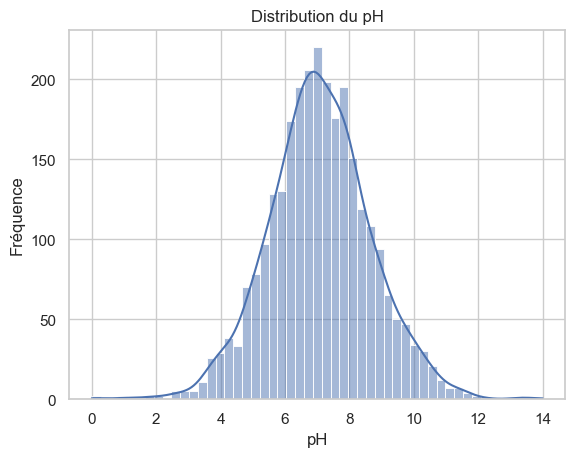

In [11]:
# Distribution d'une variable exemple (pH)
sns.histplot(df['ph'], kde=True)
plt.title("Distribution du pH")
plt.xlabel("pH")
plt.ylabel("Fréquence")
plt.show()

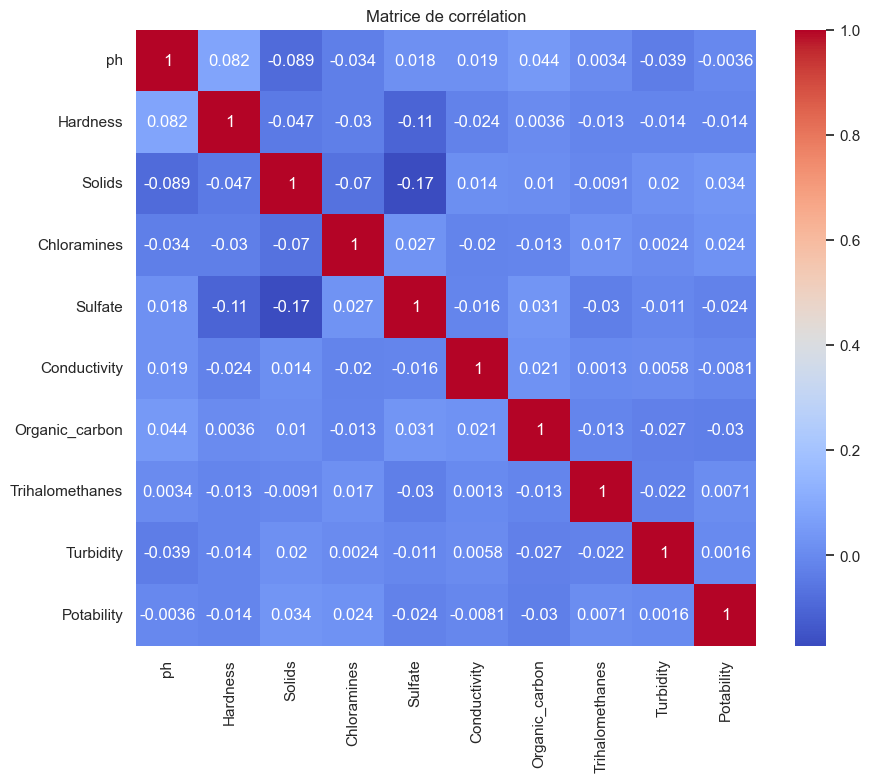

In [13]:
# Matrice de corrélation
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation")
plt.show()

In [15]:
# Vérification des valeurs manquantes par colonne
missing_values = df.isnull().sum()
print("Valeurs manquantes avant traitement :\n", missing_values)

Valeurs manquantes avant traitement :
 ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


In [17]:
# Imputation des valeurs manquantes par la médiane
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
df_clean = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Vérification post-traitement
print("Valeurs manquantes après traitement :\n", df_clean.isnull().sum())

Valeurs manquantes après traitement :
 ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


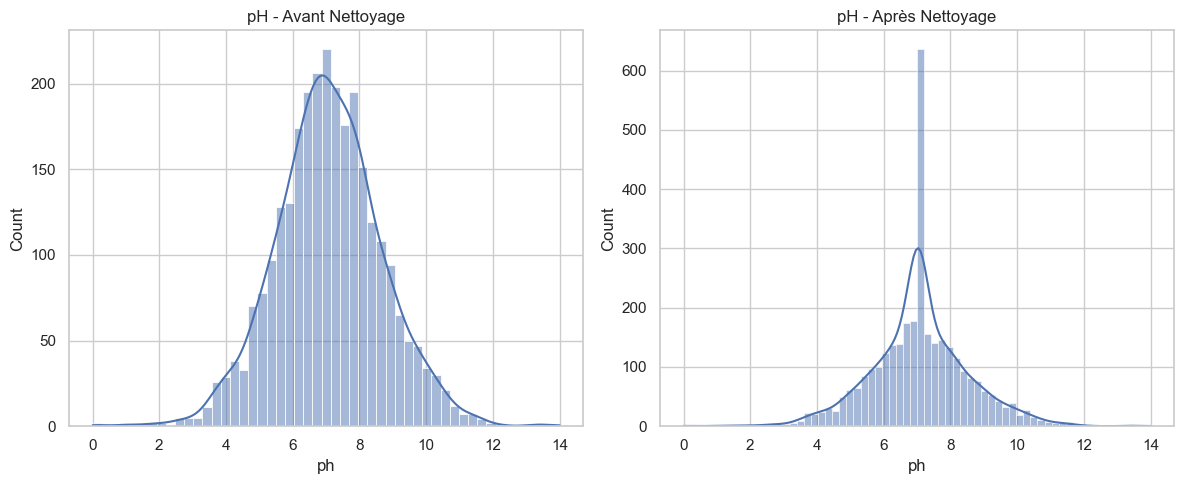

In [19]:
# Comparaison du pH avant et après nettoyage
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.histplot(df['ph'], kde=True, ax=axes[0])
axes[0].set_title("pH - Avant Nettoyage")

sns.histplot(df_clean['ph'], kde=True, ax=axes[1])
axes[1].set_title("pH - Après Nettoyage")

plt.tight_layout()
plt.show()

In [21]:
# Sauvegarder les données nettoyées dans un nouveau fichier
df_clean.to_csv("../data/processed/water_potability_clean.csv", index=False)
print("✅ Données nettoyées sauvegardées avec succès.")

✅ Données nettoyées sauvegardées avec succès.


In [23]:
import pandas as pd

# Charger le fichier CSV contenant les données nettoyées
df_clean = pd.read_csv("../data/processed/water_potability_clean.csv")

# Afficher les 5 premières lignes
df_clean.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0.0
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656,0.0
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934,0.0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0.0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0.0


In [25]:
# Vérifier s'il reste des valeurs manquantes
print(df_clean.isnull().sum())

# Afficher les dimensions du jeu de données
print("Dimensions du dataset :", df_clean.shape)

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64
Dimensions du dataset : (3276, 10)


In [30]:
import pandas as pd

# تحميل الملف
df = pd.read_csv("../data/raw/Water Quality Monitoring Dataset_ Ireland.csv")

# عرض أول 5 صفوف
print(df.head())

# عرض أسماء الأعمدة
print(df.columns)

# معلومات سريعة
print(df.info())

   WaterbodyName  Years SampleDate  Alkalinity-total (as CaCO3)  \
0  ABBEYTOWN_010   2023        Feb                        314.0   
1          Allua   2007        Aug                         14.0   
2          Allua   2007        Aug                         17.0   
3          Allua   2007        Aug                         18.0   
4          Allua   2007        Sep                         19.0   

   Ammonia-Total (as N)  BOD - 5 days (Total)  Chloride  Conductivity @25°C  \
0                 0.033                   1.2      27.3               711.0   
1                 0.033                   1.2      10.0                71.0   
2                 0.033                   1.2      11.5                79.0   
3                 0.033                   1.2      11.3                78.0   
4                 0.033                   1.2      10.5                76.0   

   Dissolved Oxygen  ortho-Phosphate (as P) - unspecified    pH  Temperature  \
0             52.50                       

In [32]:
# عدد القيم المفقودة في كل عمود
print(df.isnull().sum())

WaterbodyName                           0
Years                                   0
SampleDate                              0
Alkalinity-total (as CaCO3)             0
Ammonia-Total (as N)                    0
BOD - 5 days (Total)                    0
Chloride                                0
Conductivity @25°C                      0
Dissolved Oxygen                        0
ortho-Phosphate (as P) - unspecified    0
pH                                      0
Temperature                             0
Total Hardness (as CaCO3)               0
True Colour                             0
dtype: int64


In [34]:
# وصف إحصائي
print(df.describe())

              Years  Alkalinity-total (as CaCO3)  Ammonia-Total (as N)  \
count  29159.000000                 29159.000000          29159.000000   
mean    2014.782537                   139.858348              0.063573   
std        4.441425                    95.554543              0.441630   
min     2007.000000                     0.000000              0.000000   
25%     2011.000000                    55.000000              0.033000   
50%     2015.000000                   127.000000              0.033000   
75%     2018.000000                   214.000000              0.033000   
max     2023.000000                   442.000000             40.000000   

       BOD - 5 days (Total)      Chloride  Conductivity @25°C  \
count          29159.000000  29159.000000        29159.000000   
mean               1.276861     20.257858          363.039081   
std                0.559890     19.127637          182.190019   
min                0.000000      0.000000           33.000000   
25%     

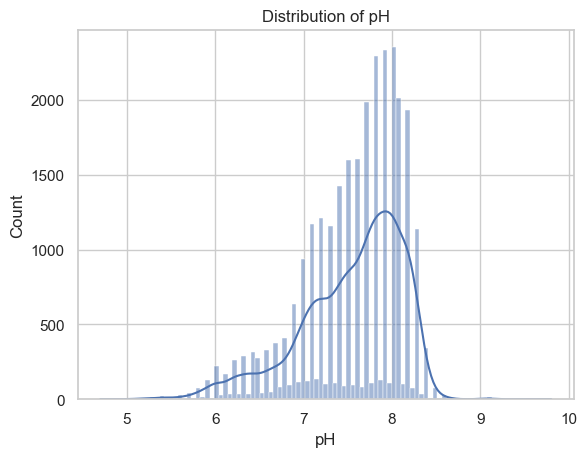

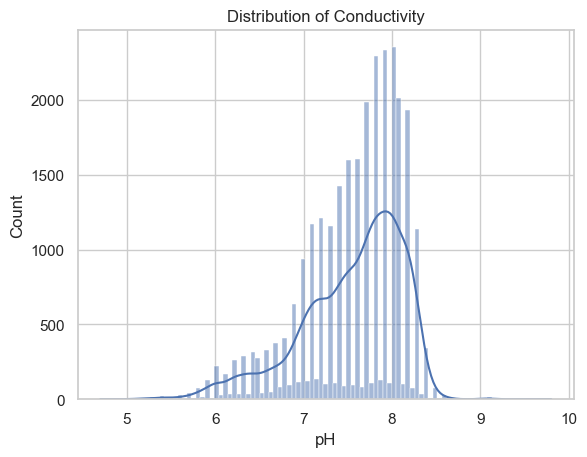

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# مثال: توزيع pH
sns.histplot(df["pH"], kde=True)
plt.title("Distribution of pH")
plt.show()

# مثال: توزيع Conductivity
sns.histplot(df["pH"], kde=True)
plt.title("Distribution of Conductivity")
plt.show()

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
df = pd.read_csv("../data/raw/Water Quality Monitoring Dataset_ Ireland.csv")  # عدّل المسار حسب مكان الحفظ

In [52]:
df.head()
df.shape
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29159 entries, 0 to 29158
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   WaterbodyName                         29159 non-null  object 
 1   Years                                 29159 non-null  int64  
 2   SampleDate                            29159 non-null  object 
 3   Alkalinity-total (as CaCO3)           29159 non-null  float64
 4   Ammonia-Total (as N)                  29159 non-null  float64
 5   BOD - 5 days (Total)                  29159 non-null  float64
 6   Chloride                              29159 non-null  float64
 7   Conductivity @25°C                    29159 non-null  float64
 8   Dissolved Oxygen                      29159 non-null  float64
 9   ortho-Phosphate (as P) - unspecified  29159 non-null  float64
 10  pH                                    29159 non-null  float64
 11  Temperature    

In [54]:
df.isnull().sum().sort_values(ascending=False)

WaterbodyName                           0
Years                                   0
SampleDate                              0
Alkalinity-total (as CaCO3)             0
Ammonia-Total (as N)                    0
BOD - 5 days (Total)                    0
Chloride                                0
Conductivity @25°C                      0
Dissolved Oxygen                        0
ortho-Phosphate (as P) - unspecified    0
pH                                      0
Temperature                             0
Total Hardness (as CaCO3)               0
True Colour                             0
dtype: int64

In [58]:
print(df.columns.tolist())

['WaterbodyName', 'Years', 'SampleDate', 'Alkalinity-total (as CaCO3)', 'Ammonia-Total (as N)', 'BOD - 5 days (Total)', 'Chloride', 'Conductivity @25°C', 'Dissolved Oxygen', 'ortho-Phosphate (as P) - unspecified', 'pH', 'Temperature', 'Total Hardness (as CaCO3)', 'True Colour']


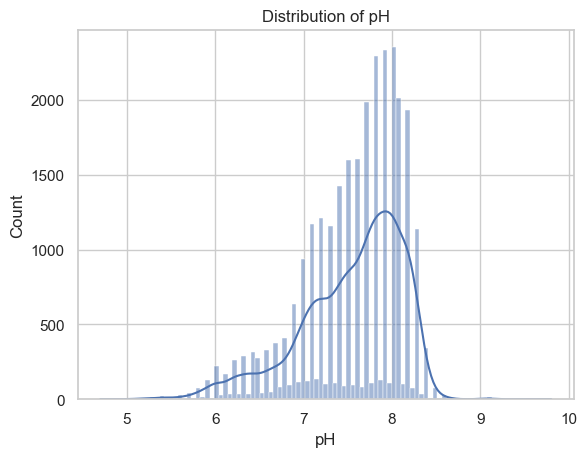

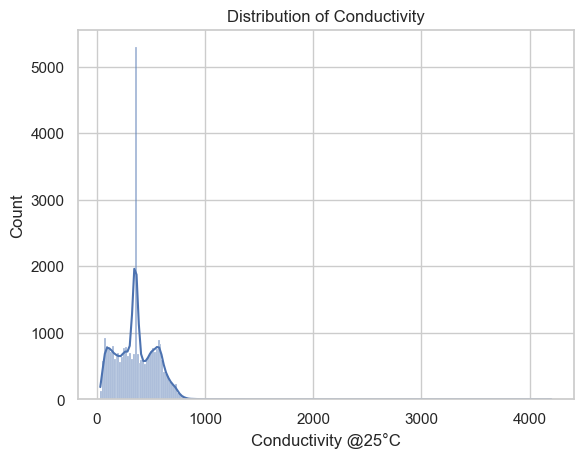

In [60]:
sns.histplot(df["pH"], kde=True)
plt.title("Distribution of pH")
plt.show()

sns.histplot(df["Conductivity @25°C"], kde=True)
plt.title("Distribution of Conductivity")
plt.show()

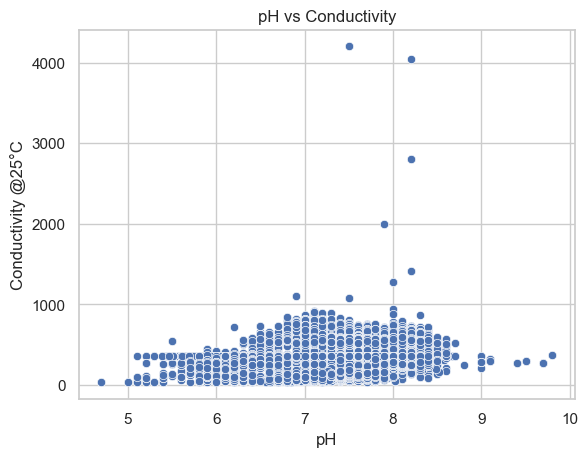

In [64]:
sns.scatterplot(data=df, x="pH", y="Conductivity @25°C")
plt.title("pH vs Conductivity")
plt.show()

In [66]:
df.to_csv("../data/processed/ireland_raw_copy.csv", index=False)

In [72]:
#🧾 الخطوة 1: اختيار الأعمدة المهمة
features_to_keep = [
    "pH",
    "Temperature",
    "Conductivity @25°C",
    "Dissolved Oxygen",
    "BOD - 5 days (Total)",
    "Ammonia-Total (as N)",
    "ortho-Phosphate (as P) - unspecified",
    "Total Hardness (as CaCO3)",
    "True Colour"
]

df_filtered = df[features_to_keep].copy()

In [75]:
# حذف الصفوف التي تحتوي على قيم مفقودة في الأعمدة المهمة
df_filtered = df_filtered.dropna()

In [79]:
def is_potable(row):
    return int(
        (6.5 <= row["pH"] <= 8.5) and
        (row["Temperature"] <= 25) and
        (row["Conductivity @25°C"] < 500) and
        (row["Dissolved Oxygen"] >= 5) and
        (row["BOD - 5 days (Total)"] < 3) and
        (row["Ammonia-Total (as N)"] < 0.5) and
        (row["ortho-Phosphate (as P) - unspecified"] < 0.1) and
        (row["Total Hardness (as CaCO3)"] < 300) and
        (row["True Colour"] < 15)
    )

In [81]:
df_filtered["Is_Potable_By_Normes"] = df_filtered.apply(is_potable, axis=1)

In [83]:
df_filtered.to_csv("../data/processed/ireland_clean_labeled.csv", index=False)

In [93]:
import pandas as pd

# 📥 Lire le fichier CSV
df = pd.read_csv("../data/processed/ireland_clean_labeled.csv")

# 🛠️ Corriger le nom du champ avec caractère incorrect
df.columns = df.columns.str.replace("Â", "", regex=False)

# ✅ Normes OMS
normes = {
    "pH": (6.5, 8.5),
    "Temperature": (0, 30),
    "Conductivity @25°C": (0, 500),
    "Dissolved Oxygen": (5, 14),
    "BOD - 5 days (Total)": (0, 5),
    "Ammonia-Total (as N)": (0, 0.5),
    "ortho-Phosphate (as P) - unspecified": (0, 0.2),
    "Total Hardness (as CaCO3)": (0, 300),
    "True Colour": (0, 15)
}

# Fonction pour tester la potabilité
def is_potable(row):
    for feature, (min_v, max_v) in normes.items():
        if not (min_v <= row[feature] <= max_v):
            return 0
    return 1

# 🔍 Comparaison
df["Vérification"] = df.apply(is_potable, axis=1)
df["Erreur"] = df["Vérification"] != df["Is_Potable_By_Normes"]

# ✅ Affichage
nb_erreurs = df["Erreur"].sum()
print(f"Nombre total : {len(df)}")
print(f"Nombre d'erreurs : {nb_erreurs}")

# 🧾 Afficher les lignes incorrectes
if nb_erreurs > 0:
    display(df[df["Erreur"]].head(10))


Nombre total : 29159
Nombre d'erreurs : 1802


,pH,Temperature,Conductivity @25°C,Dissolved Oxygen,BOD - 5 days (Total),Ammonia-Total (as N),ortho-Phosphate (as P) - unspecified,Total Hardness (as CaCO3),True Colour,Is_Potable_By_Normes,Vérification,Erreur
18,6.95,11.6,99.0,61.000,1.20,0.129,0.019,19.1,9.0,1,0,True
19,7.24,13.3,101.0,58.550,1.20,0.052,0.019,152.0,13.0,1,0,True
20,7.10,13.7,93.0,58.500,1.20,0.058,0.019,19.1,14.0,1,0,True
21,7.15,13.4,99.0,58.000,1.20,0.051,0.019,21.1,14.0,1,0,True
110,6.72,9.2,356.0,56.520,0.73,0.000,-0.004,24.0,10.0,1,0,True
112,6.90,8.7,356.0,58.450,2.90,0.000,0.010,24.0,10.0,1,0,True
115,6.57,10.5,356.0,56.360,1.20,0.008,0.004,38.0,10.0,1,0,True
117,7.01,5.6,356.0,57.400,1.80,0.000,0.001,23.0,7.5,1,0,True
118,7.33,6.4,356.0,56.285,1.00,0.000,0.002,21.0,5.0,1,0,True
126,6.87,5.2,356.0,54.285,1.30,0.000,0.008,22.0,10.0,1,0,True
